In [ ]:
# Initialize Otter Grader
import otter
grader = otter.Notebook()

![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

___

#### NAME:

#### STUDENT ID:
___

# Data-X Fall 2020: Homework 04

### Linear regression and matplotlib.

Author: Ming-Yen Kao.

In this homework, you will do some exercises with regression and plotting. 

## Only submit your jupyter notebook to Gradescope

## Question 1 - Data Pre-processing

Data Source of SP500.csv is Yahoo Finance; Data Source of Gold.csv is Gold.org; Data Source of 30YTBond.csv is Macrotrends.net.
SP500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The unit of Gold price is USD per oz. 30YTBond stands for US Treasury Bond future price with maturity of 30 years.


1a) Use pandas to load data from .csv to DataFrame. Please load 'SP500.csv' to df_SP500, load 'Gold.csv' to df_Gold, and load '30YTBond.csv' to df_30YTB.

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 1
-->

In [1]:
# Load required modules
import numpy as np
import pandas as pd
import datetime as dt

df_SP500=pd.read_csv("SP500.csv")
df_Gold=pd.read_csv("Gold.csv")
df_30YTB=pd.read_csv("30YTBond.csv")

print(df_SP500.head(5))
print(df_Gold.head(5))
print(df_30YTB.head(5))

         Date       Open       High        Low      Close  Adj Close  Volume
0  1927-12-01  17.660000  17.660000  17.660000  17.660000  17.660000       0
1  1928-01-01  17.760000  17.760000  17.260000  17.570000  17.570000       0
2  1928-02-01  17.530001  17.629999  16.950001  17.260000  17.260000       0
3  1928-03-01  17.299999  19.280001  17.299999  19.280001  19.280001       0
4  1928-04-01  18.910000  19.750000  18.910000  19.750000  19.750000       0
         Date  US dollar   Euro  Pound sterling  Japanese yen
0  1969/12/31      35.20  22.24           14.66      12592.44
1   1970/1/30      34.99  23.20           14.54      12496.35
2   1970/2/27      35.02  23.26           14.55      12529.95
3   1970/3/31      35.30  23.42           14.67      12627.65
4   1970/4/30      35.85  23.79           14.93      12858.36
        Date    value
0  1977/8/22  102.375
1  1977/8/23  102.781
2  1977/8/24  102.656
3  1977/8/25  103.094
4  1977/8/26  103.062


In [ ]:
grader.check("q1a")

1b) Only leave 'Date' and 'US dolloar price' in df_Gold and only leave 'Date' and 'closing price' in df_SP500. In other word 'Open', 'High', 'Low', 'Adj Close', and 'Volume' have to be dropped from df_SP500. 'Euro', 'Pound sterling', and 'Japanese yen' have to be dropped from df_Gold.

<!--
BEGIN QUESTION
name: q1b
manual: false
points: 2
-->

In [2]:
df_Gold=df_Gold[["Date","US dollar"]]
print(df_Gold.head(5))
df_SP500=df_SP500[["Date","Close"]]
print(df_SP500.head(5))

         Date  US dollar
0  1969/12/31      35.20
1   1970/1/30      34.99
2   1970/2/27      35.02
3   1970/3/31      35.30
4   1970/4/30      35.85
         Date      Close
0  1927-12-01  17.660000
1  1928-01-01  17.570000
2  1928-02-01  17.260000
3  1928-03-01  19.280001
4  1928-04-01  19.750000


In [ ]:
grader.check("q1b")

1c) Sample the very first price of the asset in each month to represnet that month. 

For example, 1999/1/2 price of bananan is 90; 1999/1/5 price of bananan is 85; 1999/1/6 price of bananan is 91. You should use 90 to represent the price of 1999/1. Please convert the date to Pandas datetime formate with day always = 1 ex: 1970-02-01 or 2000-11-01. Replace the original data frames of df_SP500, df_Gold, and df_30YTB with the sampled data frames. For example, we have [1999/1/2: 90, 1999/1/5: 85, 1999/1/6: 91, 1999/2/4: 70, 1999/2/7: 89]. After sampling, we should have [1999/1/1: 90, 1999/2/1: 70].

* Remember to keep the Date in the format of Pandas timestamp!

df_30YTB after sampling should be
<img src="./Img6.png">
<!--
BEGIN QUESTION
name: q1c
manual: false
points: 3
-->

In [3]:
df_SP500["Date"]=pd.to_datetime(df_SP500["Date"])
df_Gold["Date"]=pd.to_datetime(df_Gold["Date"])
df_30YTB["Date"]=pd.to_datetime(df_30YTB["Date"])

for i in range(len(df_SP500)):
    df_SP500["Date"][i]=df_SP500["Date"][i].replace(day=1)
df_SP500=df_SP500.loc[df_SP500["Date"].drop_duplicates(keep="first").index,:]

for i in range(len(df_Gold)):
    df_Gold["Date"][i]=df_Gold["Date"][i].replace(day=1)
df_Gold=df_Gold.loc[df_Gold["Date"].drop_duplicates(keep="first").index,:]

for i in range(len(df_30YTB)):
    df_30YTB["Date"][i]=df_30YTB["Date"][i].replace(day=1)
df_30YTB=df_30YTB.loc[df_30YTB["Date"].drop_duplicates(keep="first").index,:]


print(df_SP500.head(5))
print(df_Gold.head(5))
print(df_30YTB.head(5))



C:\Users\tobias.grab\Anaconda3\envs\dataNew\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tobias.grab\Anaconda3\envs\dataNew\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\tobias.grab\Anaconda3\envs\dataNew\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

        Date      Close
0 1927-12-01  17.660000
1 1928-01-01  17.570000
2 1928-02-01  17.260000
3 1928-03-01  19.280001
4 1928-04-01  19.750000
        Date  US dollar
0 1969-12-01      35.20
1 1970-01-01      34.99
2 1970-02-01      35.02
3 1970-03-01      35.30
4 1970-04-01      35.85
         Date    value
0  1977-08-01  102.375
8  1977-09-01  103.062
29 1977-10-01  102.688
50 1977-11-01  100.812
71 1977-12-01  101.312


In [ ]:
grader.check("q1c")

## Question 2 - Data Visualization & Linear Regression

In [4]:
import matplotlib.pyplot as plt

2a) Oberve the example plot below and try to reproduce it. y-left is df_SP500['Date'] in linear scale and y-right is df_SP500['Date'] in log scale. 

Specs:
1. x-label and x-scale in black
2. y-left label, y-left scale, and the corresponding line-plot in blue
3. y-right label, y-right scale, and the corresponding line-plot in red
4. plot title is 'Price of the S&P 500 Index'
5. y-left label is 'Price (linear in $ US Dollars)'

6. y-right label is 'Price (log in $ US Dollars)'
7. x label is 'Date'


Some helpful functions: axis.set_xlabel(), axis.set_ylabel(), axis.tick_params(), and axis.twinx()

<img src="./Img1.png">

<!--
BEGIN QUESTION
name: q2a
manual: false
points: 3
-->

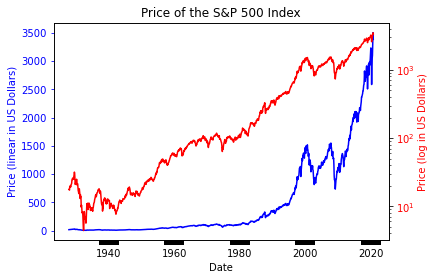

In [5]:
fig,axis=plt.subplots()
axis.plot(df_SP500["Date"], df_SP500["Close"],color="blue")
axis.set_ylabel("Price (linear in US Dollars)",color="blue")
axis.set_xlabel("Date")
axis.tick_params(axis="y",colors='blue')
axis.tick_params(axis="x",colors="black", length=5, width=20)


axis.set_title('Price of the S&P 500 Index')


axis2=axis.twinx()
axis2.set_ylabel("Price (log in US Dollars)", color="red")
axis2.set_yscale("log")
axis2.tick_params(labelcolor="red")
axis2.plot(df_SP500["Date"], df_SP500["Close"],color="red")

plt.show()

In [ ]:
grader.check("q2a")

2b) Linear regression of S&P 500 Index. 

1. Convert the 'Date' in df_SP500 to numpy.array and convert the unit to day as 'x' and convert the 'Close' in df_SP500 to numpy.array as 'y'. 
2. Shift the date so that the first element in array 'x' is 0.
3. Follow the linear regression procedure in the slides https://datax.berkeley.edu/wp-content/uploads/2020/09/slides-m100-linear-regression.pdf. Page 9.
4. Calculate the root mean square error and store it in 'error'. 
5. Finally plot the data and the fitting line together as the example plot below. 

Specs of plot:
1. Color in default (please plot the data first so that the color of data will be blue)
2. plot title is 'Price of the S&P 500 Index'
3. x-label is 'Date'
4. y-label is 'Price (in $ US Dollars)'

<img src="./Img2.png">

<!--
BEGIN QUESTION
name: q2b
manual: false
points: 3
-->

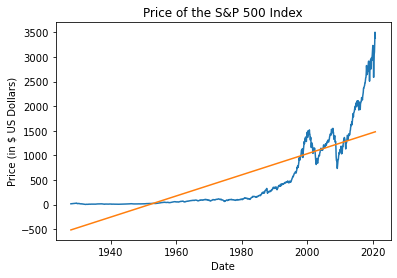

In [6]:
y=np.array([df_SP500["Close"]])
x=np.arange(df_SP500["Date"].shape[0])
x=np.arange(len(x))

E_x= np.mean(x)
E_y=np.mean(y)
cov_xy = np.mean(x*y)-E_x*E_y
y_0=E_y - cov_xy/np.var(x)*E_x
m=cov_xy/np.var(x)

y_pred=m*x+y_0

fig,axis=plt.subplots()
axis.plot(df_SP500["Date"], df_SP500["Close"])
axis.plot(df_SP500["Date"], y_pred)
axis.set_title("Price of the S&P 500 Index")
axis.set_xlabel("Date")
axis.set_ylabel("Price (in $ US Dollars)")
plt.show()

error= np.mean(np.square(y_pred-y))

#print ('Root Mean Square Error: ', error )

In [ ]:
grader.check("q2b")

2c) Exponential regression of S&P 500 Index. 
1. Do the same thing as in 2b, but try to use exponential to fit the data this time. 
2. Convert the 'Date' in df_SP500 to numpy.array and convert the unit to day as 'x' and convert the 'Close' in df_SP500 to numpy.array as 'y'. 
3. Shift the date so that the first element in array 'x' is 0.
4. Use exponential function to fit the data. Calculate the root mean square error and store it in 'error'. 
5. Finally plot the data and the fitting line  together as the example below.

Hint: apply log to y value so that you can process the data as linear regression in 2(b). Remember to convert it back for the calculation for the 'error' and for the plot.


Specs of plot:
1. Color in default (please plot the data first so that the color of data will be blue)
2. plot title is 'Price of the S&P 500 Index'
3. x-label is 'Date'
4. y-label is 'Price (in $ US Dollars)'

<img src="./Img3.png">

<!--
BEGIN QUESTION
name: q2c
manual: false
points: 3
-->

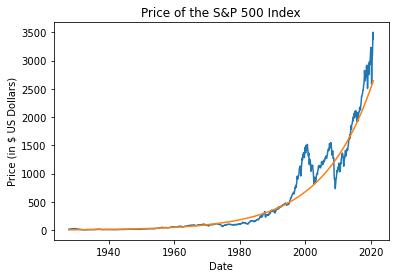

Root Mean Square Error:  34070.755931679814


In [7]:
y=np.log(np.array([df_SP500["Close"]]))
x=np.arange(df_SP500["Date"].shape[0])
x=np.arange(len(x))

E_x= np.mean(x)
E_y=np.mean(y)
cov_xy = np.mean(x*y)-E_x*E_y
y_0=E_y - cov_xy/np.var(x)*E_x
m=cov_xy/np.var(x)

y_pred=np.exp(m*x+y_0)

fig,axis=plt.subplots()
axis.plot(df_SP500["Date"], df_SP500["Close"])
axis.plot(df_SP500["Date"], y_pred)
axis.set_title("Price of the S&P 500 Index")
axis.set_xlabel("Date")
axis.set_ylabel("Price (in $ US Dollars)")
plt.show()

error= np.mean(np.square(y_pred-np.exp(y)))
print ('Root Mean Square Error: ',  error)

In [ ]:
grader.check("q2c")

2d) Scatter plot of month-to-month return of S&P 500 Index and 30 Year Treasury Bond.
1. Compute the month-to-month returns on S&P 500 and 30 Year Treasury Bond between 1977-08-01 (inclusive) and 2019-12-31 (inclusive). The month-to-month returns should be in the net-increment. For example, price on 2014-1-1 is 100 and price on 2014-2-1 is 105. The month-to-month return from 2014-1-1 to 2014-2-1 should be 0.05. Another example, if the array of the price of S&P 500 is [100, 105, 100, 105], the month-to-month return array should be [0.05, -0.04761904762, 0.05].
2. Save the month-to-month returns in the format of numpy arrary in ‘x3’ and ‘y3’, respectively. Note that if the dimension of the array of price is n, the dimension of month-to-month return array should be n-1.
3. Finally plot ‘x3’ and ‘y3’ as scatter plot. Try to reproduce the plot below.


Specs of plot:
1. Color in default
2. plot title is 'Scatter Plot of the Returns'
3. x-label is 'Month-to-month return of the S&P 500 Index'
4. y-label is 'Month-to-month return of the 30-Year T-bond'

<img src="./Img4.png">

<!--
BEGIN QUESTION
name: q2d
manual: false
points: 2
-->

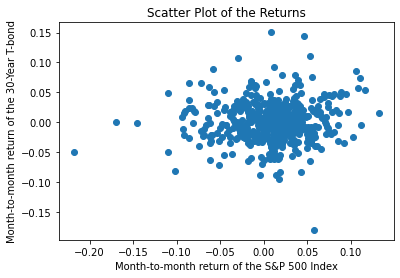

In [8]:
ts_low=pd.to_datetime("1977-08-01")
ts_high=pd.to_datetime("2019-12-31")
df_SP500=df_SP500[df_SP500.Date >=ts_low]
df_SP500=df_SP500[df_SP500.Date <=ts_high]
df_30YTB=df_30YTB[df_30YTB.Date >=ts_low]
df_30YTB=df_30YTB[df_30YTB.Date <=ts_high]


x3=(np.array(df_SP500.Close[1:])-np.array(df_SP500.Close[:-1]))/np.array(df_SP500.Close[:-1])
y3=(np.array(df_30YTB.value[1:])-np.array(df_30YTB.value[:-1]))/np.array(df_30YTB.value[:-1])


fig,axis=plt.subplots()
axis.scatter(x3,y3)
axis.set_title("Scatter Plot of the Returns")
axis.set_xlabel("Month-to-month return of the S&P 500 Index")
axis.set_ylabel("Month-to-month return of the 30-Year T-bond")
plt.show()


In [ ]:
grader.check("q2d")

2e) Plot the histogram of S&P 500 month-to-month returns. The y-axis is count, and the x-axis is month-to-month return. The number of the bars should be 100. Try to reproduce the plot below.


Specs of plot:
1. Color in default
2. plot title is 'Histogram of S&P 500'
3. x-label is 'Month-to-Month Return'
4. y-label is 'Count'
5. number of the bars should be 100.

<img src="./Img5.png">

<!--
BEGIN QUESTION
name: q2e
manual: false
points: 1
-->

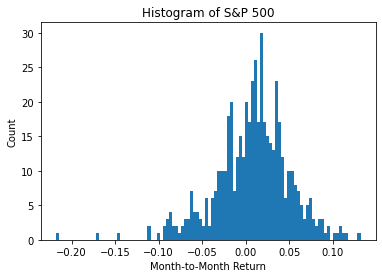

In [9]:
fig,axis=plt.subplots()
axis.hist(x3,100)
axis.set_title("Histogram of S&P 500")
axis.set_xlabel("Month-to-Month Return")
axis.set_ylabel("Count")
plt.show()

In [ ]:
grader.check("q2e")

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [ ]:
# Save your notebook first, then run this cell to create a pdf for your reference.